In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings("ignore")

In [10]:
base_ml = pd.read_csv('C:/Users/MyDELL/Desktop/msds/repositorio/household_energy/datasets/basef_ml.csv')

In [11]:
base_ml.head()

,Month,Hour,DayOfWeek,Holiday,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,EnergyConsumption,TotalUsage
0,1,0,Saturday,No,0.063330,43.431581,0.198865,0.145910,On,Off,-1.357179,75.364373,1
1,1,1,Saturday,No,0.915648,54.225919,-0.328667,-1.230602,On,On,0.724126,83.401855,2
2,1,2,Saturday,No,1.235446,58.907658,0.847140,-0.886474,Off,Off,-0.921408,78.270888,0
3,1,3,Saturday,No,-1.600051,50.371637,-0.187934,-1.230602,Off,On,-0.718399,56.519850,1
4,1,4,Saturday,No,-0.608102,51.401421,-1.409920,1.522423,On,Off,-1.324712,70.811732,1


In [16]:
cat_cols = base_ml.select_dtypes(exclude=['int64', 'float64']).columns
base_ml = pd.get_dummies(base_ml, columns=cat_cols, drop_first=True)
# Separar variables
X = base_ml.drop(columns=['EnergyConsumption'])
y = base_ml['EnergyConsumption']

In [17]:
# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalamiento de variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Configuración de modelos e hiperparámetros
model_params = {
    'Linear Regression': {
        'model': LinearRegression(),
        'params': {}
    },
    'Ridge': {
        'model': Ridge(),
        'params': {'alpha': 1.0}
    },
    'Lasso': {
        'model': Lasso(),
        'params': {'alpha': 0.01}
    },
    'Random Forest': {
        'model': RandomForestRegressor(),
        'params': {
            'n_estimators': 300,
            'max_depth': 20,
            'min_samples_split': 5,
            'random_state': 42
        }
    },
    'Gradient Boosting': {
        'model': GradientBoostingRegressor(),
        'params': {
            'n_estimators': 300,
            'learning_rate': 0.03,
            'max_depth': 4,
            'random_state': 42
        }
    },
    'XGBoost': {
        'model': XGBRegressor(),
        'params': {
            'n_estimators': 300,
            'learning_rate': 0.03,
            'max_depth': 4,
            'subsample': 0.8,
            'colsample_bytree': 0.8,
            'random_state': 42
        }
    }
}

In [18]:
results = {}

for name, mp in model_params.items():
    model = mp['model'].set_params(**mp['params'])
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results[name] = {'RMSE': rmse, 'R2': r2}
    print(f"{name} → RMSE: {rmse:.2f}, R2: {r2:.2f}")

Linear Regression → RMSE: 7.81, R2: 0.27
Ridge → RMSE: 7.81, R2: 0.27
Lasso → RMSE: 7.81, R2: 0.27
Random Forest → RMSE: 7.97, R2: 0.24
Gradient Boosting → RMSE: 7.87, R2: 0.26
XGBoost → RMSE: 7.85, R2: 0.26


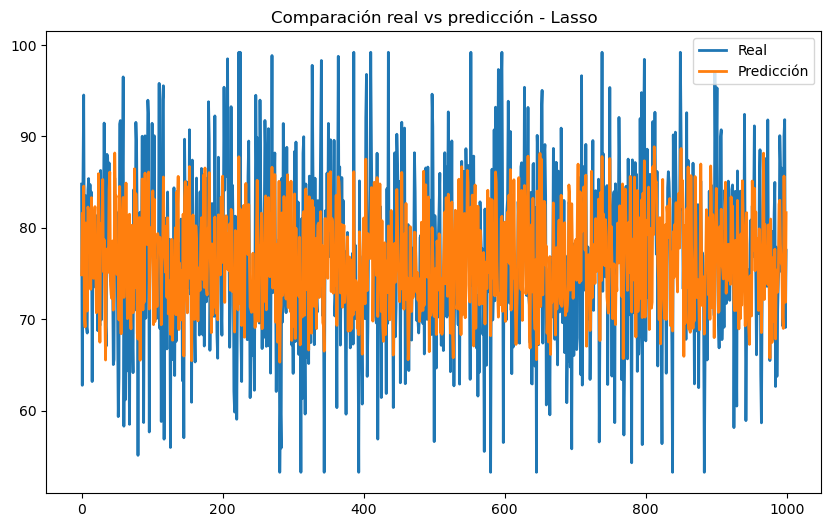

In [20]:
# Identificar el mejor modelo
best_model_name = max(results, key=lambda x: results[x]['R2'])
best_model = model_params[best_model_name]['model'].set_params(**model_params[best_model_name]['params'])
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# Comparar visualmente
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Real', linewidth=2)
plt.plot(y_pred, label='Predicción', linewidth=2)
plt.title(f'Comparación real vs predicción - {best_model_name}')
plt.legend()
plt.show()